Transformed Data:
[[-0.55137063 -0.12785557]
 [-1.43507103  0.36286481]
 [-0.59519622  0.23728313]
 [-0.4210379   0.24792907]
 [-0.87846627  0.08623746]
 [-0.68093113  1.73417759]
 [ 0.69443802 -0.85264685]
 [-1.44179412 -0.47680297]
 [ 0.12676065  0.8963902 ]
 [ 1.21494028  1.02773742]
 [-0.18884504  1.74342403]
 [ 1.2174551  -0.94925284]
 [ 1.51008442  1.23539103]
 [ 0.77086773 -1.63006568]
 [-2.24376605  1.44912466]
 [ 2.52285536 -0.21682191]
 [ 0.89336398 -0.82901801]
 [ 0.3967701  -1.08665966]
 [ 0.82807153 -1.23263814]
 [ 1.64681119 -1.51307634]
 [-0.76120658  0.65785451]
 [-0.76091846  0.45937561]
 [-1.01347439 -0.25418428]
 [-1.27923546 -1.43251288]
 [-1.43052943  0.93466349]
 [ 0.86445362  1.01498541]
 [ 0.74239438  0.4079912 ]
 [-0.69920362  0.14807171]
 [-1.33140654  0.4068659 ]
 [-1.77532006  1.39819323]
 [ 1.15975007 -1.7352026 ]
 [-0.36935643  0.5492413 ]
 [-1.93149084  0.15401343]
 [ 0.4473557   1.50945329]
 [ 1.22646208  1.46887717]
 [ 0.10161502  0.3436705 ]
 [-0.15095

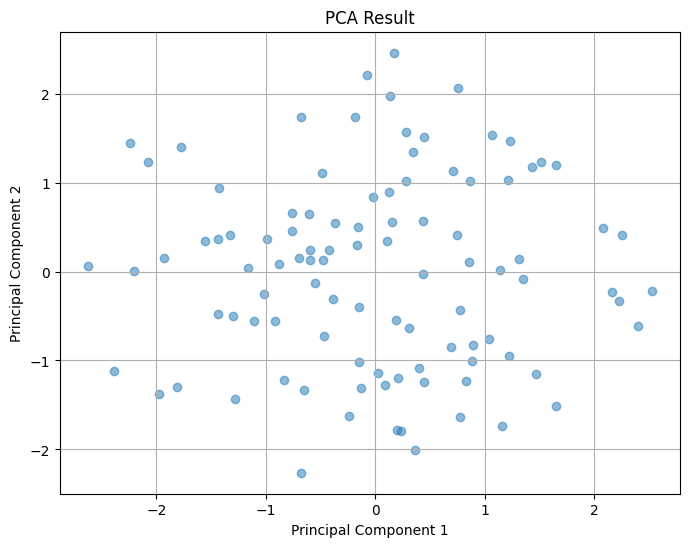

In [1]:
#code 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Standardization
def standardize_data(data):
    """Standardize the dataset."""
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Step 2: Covariance Matrix Computation
def covariance_matrix(data):
    """Compute the covariance matrix."""
    return np.cov(data, rowvar=False)

# Step 3: Compute Eigenvalues and Eigenvectors
def compute_eigen(cov_matrix):
    """Compute eigenvalues and eigenvectors."""
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    return eigenvalues, eigenvectors

# Step 4: Sort Eigenvalues and Eigenvectors
def sort_eigenpairs(eigenvalues, eigenvectors):
    """Sort eigenvalues and corresponding eigenvectors in descending order."""
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    return sorted_eigenvalues, sorted_eigenvectors

# Step 5: Transform the data
def transform_data(data, eigenvectors, num_components):
    """Transform the data using the top 'num_components' eigenvectors."""
    return np.dot(data, eigenvectors[:, :num_components])

# Main function to perform PCA
def pca(data, num_components):
    """Perform PCA on the dataset."""
    standardized_data = standardize_data(data)
    cov_matrix = covariance_matrix(standardized_data)
    eigenvalues, eigenvectors = compute_eigen(cov_matrix)
    sorted_eigenvalues, sorted_eigenvectors = sort_eigenpairs(eigenvalues, eigenvectors)
    transformed_data = transform_data(standardized_data, sorted_eigenvectors, num_components)
    return transformed_data, sorted_eigenvalues

# Sample dataset (You can replace this with your own data)
# Here we generate a random dataset with 5 features
np.random.seed(0)
data = np.random.rand(100, 5)

# Specify the number of principal components to keep
num_components = 2

# Perform PCA
transformed_data, sorted_eigenvalues = pca(data, num_components)

# Output results
print("Transformed Data:")
print(transformed_data)
print("\nEigenvalues:")
print(sorted_eigenvalues)

# Optional: Visualize the transformed data if 2D
if num_components == 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.5)
    plt.title('PCA Result')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid()
    plt.show()


Covariance Matrix:
 [[1.2        1.19502925 1.19179312]
 [1.19502925 1.2        1.19882254]
 [1.19179312 1.19882254 1.2       ]]
Transformed Data:
 [[ 2.37722948 -0.10252628]
 [ 2.294788    0.14433216]
 [-0.42204131 -0.06491015]
 [-0.68580592 -0.06754867]
 [-1.65020281  0.04664573]
 [-1.91396743  0.04400721]]


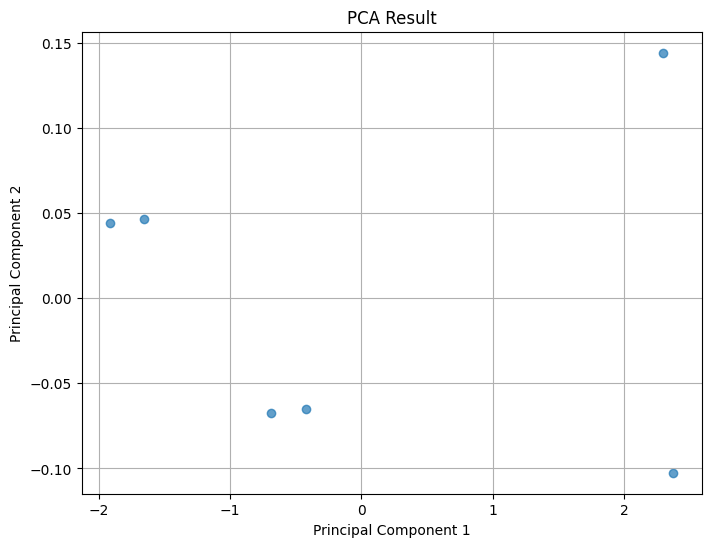

In [2]:
#code 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the dataset
# For demonstration, we will create a synthetic dataset
# Replace this with your actual dataset
data = {
    'Feature1': [2.5, 2.4, 3.5, 3.6, 3.9, 4.0],
    'Feature2': [2.4, 2.5, 3.6, 3.7, 4.1, 4.2],
    'Feature3': [3.5, 3.6, 4.5, 4.6, 5.0, 5.1]
}
df = pd.DataFrame(data)

# Step 2: Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 3: Covariance Matrix Computation
covariance_matrix = np.cov(scaled_data.T)
print("Covariance Matrix:\n", covariance_matrix)

# Step 4: Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Step 5: Sort Eigenvalues and Corresponding Eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 6: Select the number of principal components
n_components = 2 # Number of principal components to keep
selected_eigenvectors = sorted_eigenvectors[:, :n_components]

# Step 7: Transform the data onto the new feature space
pca_result = scaled_data.dot(selected_eigenvectors)

# Output the transformed data
print("Transformed Data:\n", pca_result)

# Optional: Visualize the PCA result if n_components is 2
if n_components == 2:
    plt.figure(figsize=(8,6))
    plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.7)
    plt.title('PCA Result')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid()
    plt.show()